In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pandas import DataFrame

In [3]:
rc("lines",    markersize=4)
rc("errorbar", capsize=3)
rc("figure",   dpi=150)

In [4]:
dat = DataFrame([
    [r"H0LiCOW+SNe+BAO ($\Lambda \rm CDM$)",     139.3,  [[4.4],[4.8]], False, "C0"],
    [r"Cepheids+SNe+BAO ($\Lambda \rm CDM$)",    137.5,  3.481,         False, "C0"],
    [ "Cepheids+SNe+BAO (Spline, $\Omega_k=0$)", 138.1,  3.494,         False, "C0"],
    [],
    ["Planck",                                   147.05, 0.30,          False, "C1"],
    ["  TT+lowE",                                147.21, 0.48,          False, "C1"],
    ["  TE+lowE",                                147.59, 0.49,          False, "C1"],
    ["  EE+lowE",                                146.46, 0.70,          False, "C1"],
    ["  TT ($\ell < 800$)",                      148.0,  0.7021,        False, "C1"],
    ["  TT ($\ell > 800$)",                      145.7,  0.8617,        False, "C1"],
    ["WMAP9+SPT+ACT",                            148.8,  0.914,         False, "C1"],
    ["SPT-SZ",                                   150.3,  2.1942,        False, "C1"],
    [r"SPTpol+$\tau$",                           149.2,  1.385,         False, "C1"],
    [r"ACTpol+$\tau$",                           149.5,  2.5,           False, "C1"],
    [r"BAO+BBN",                                 151.6,  3.4,           False, "C4"],    
    [],
    ["Planck",                                   148.4,  1.881,         False, "C1"],
    ["Planck+3G(TT,TE,EE+lensing)",              148.4,  0.500,         True,  "C1"],
    [],
    ["Planck",                                   148.7,  2.854,         False, "C1"],
    ["Planck+3G(TT,TE,EE+lensing)",              148.7,  0.73,          True,  "C1"]])

# use the spline result as the fiducial
(rs_fid, σrs_fid) = dat.iloc[2,1:3]

dat

,0,1,2,3,4
0,H0LiCOW+SNe+BAO ($\Lambda \rm CDM$),139.30,"[[4.4], [4.8]]",False,C0
1,Cepheids+SNe+BAO ($\Lambda \rm CDM$),137.50,3.481,False,C0
2,"Cepheids+SNe+BAO (Spline, $\Omega_k=0$)",138.10,3.494,False,C0
3,None,NaN,None,None,None
4,Planck,147.05,0.3,False,C1
5,TT+lowE,147.21,0.48,False,C1
6,TE+lowE,147.59,0.49,False,C1
7,EE+lowE,146.46,0.7,False,C1
8,TT ($\ell < 800$),148.00,0.7021,False,C1
9,TT ($\ell > 800$),145.70,0.8617,False,C1


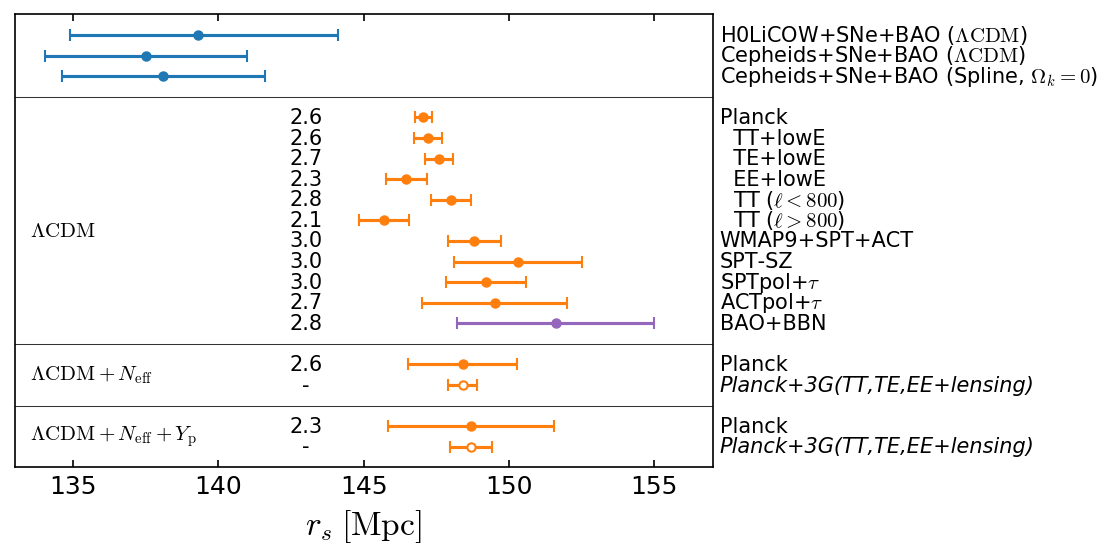

In [5]:
xlims = [133, 157]

for i,(label, rs, σrs, isforecast, color) in dat.iterrows():
    if label is not None:
        errorbar(rs, -i, xerr=σrs, c=color, marker="o", markerfacecolor=("w" if isforecast else color))
        text(157.25, -i, label, va="center", style="italic" if isforecast else None)
        if color != "C0":
            text(143, -i, ("%.1f"%((rs-rs_fid)/sqrt(σrs**2 + σrs_fid**2)) if not isforecast else "-"), va="center", ha="center")
    else:
        plot(xlims, [-i]*2, "k", lw=0.5, alpha=0.8)
        
yticks([])
xlim(*xlims)

xlabel(r"$r_s\;[\rm Mpc]$")

text(133.5, -9.5,  r"$\Lambda {\rm CDM}$", va="center")
text(133.5, -16.5, r"$\Lambda {\rm CDM} + N_{\rm eff}$", va="center")
text(133.5, -19.5, r"$\Lambda {\rm CDM} + N_{\rm eff} + Y_{\rm p}$", va="center")
# text(133.5, -22.5, r"$\Lambda {\rm CDM} + \Omega_k$", va="center")

savefig("Figures/summaryplot.pdf", bbox_inches="tight")